# Setup

default version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [6]:
!pip install ctgan
!pip install table_evaluator
#!gdown 1aXARwE-sdNGWc6biq1HCAT6Aak0mbVZZ     Linkedin Dataset

We use the linkedin Dataset


In [37]:
import pandas as pd
import pickle
data = pd.read_pickle(r'/Users/atishayjain/Downloads/LinkedIn_Dataset.pcl')
data = data[['Photo','Connections','Followers','Number of Experiences','Number of Languages','Number of Organizations','Number of Activities']]

In [38]:
data

,Photo,Connections,Followers,Number of Experiences,Number of Languages,Number of Organizations,Number of Activities
0,No,500,717,2,0,0,1
1,No,500,1340,1,3,0,0
2,Yes,7,7,2,0,0,0
3,Yes,0,0,1,0,0,0
4,Yes,61,61,1,0,0,6
...,...,...,...,...,...,...,...
3595,Yes,106,717,3,0,0,4
3596,Yes,102,6,5,0,0,3
3597,Yes,435,10,0,0,0,0
3598,Yes,280,34,1,2,0,4


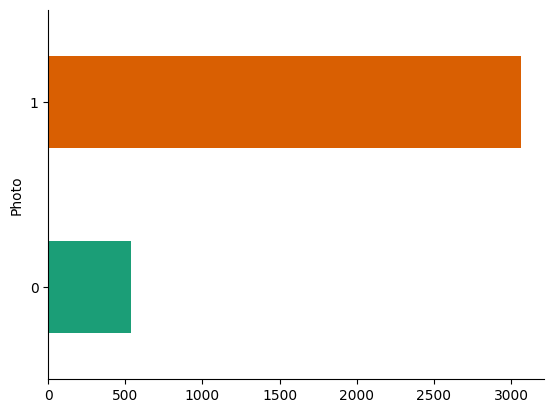

In [ ]:
# @title Photo

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Photo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [39]:
discrete_columns=['Photo']

#Model training

In [40]:
import pandas as pd



In [41]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Photo                    3600 non-null   object
 1   Connections              3600 non-null   object
 2   Followers                3600 non-null   object
 3   Number of Experiences    3600 non-null   object
 4   Number of Languages      3600 non-null   object
 5   Number of Organizations  3600 non-null   object
 6   Number of Activities     3600 non-null   object
dtypes: object(7)
memory usage: 197.0+ KB
None


In [42]:
from ctgan import CTGAN

# Instantiate and train the CTGAN model
ctgan = CTGAN(verbose=True)  
ctgan.fit(data, discrete_columns, epochs=200)

Gen. (-2.09) | Discrim. (-0.13): 100%|██████████| 200/200 [00:35<00:00,  5.64it/s]


Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

#Synthetic data generation

In [43]:
samples = ctgan.sample(3600)
samples

,Photo,Connections,Followers,Number of Experiences,Number of Languages,Number of Organizations,Number of Activities
0,Yes,504,9880,3,0,1,1
1,No,502,1420,7,0,0,5
2,Yes,504,-3213,5,2,0,5
3,Yes,501,10225,2,0,0,8
4,No,498,1960,5,0,3,0
...,...,...,...,...,...,...,...
3595,Yes,505,-3450,4,0,0,7
3596,No,501,-1780,7,0,2,25
3597,Yes,497,901,4,0,0,10
3598,Yes,497,3804,2,0,0,11


#Evaluation

In [48]:
pip install table_evaluator

  Using cached table_evaluator-1.6.1-py3-none-any.whl.metadata (8.8 kB)
  Using cached dython-0.7.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
Using cached table_evaluator-1.6.1-py3-none-any.whl (22 kB)
Using cached dython-0.7.3-py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


In [49]:
from table_evaluator import TableEvaluator

try:
    print(data.shape, samples.shape)
    table_evaluator = TableEvaluator(data, samples, cat_cols=categorical_features)
    table_evaluator.visual_evaluation()
except Exception as e:
    print("Failed to visually evaluate the data:", str(e))


(3600, 7) (3600, 7)
Failed to visually evaluate the data: name 'categorical_features' is not defined


(3600, 7) (3600, 7)


ValueError: min() arg is an empty sequence

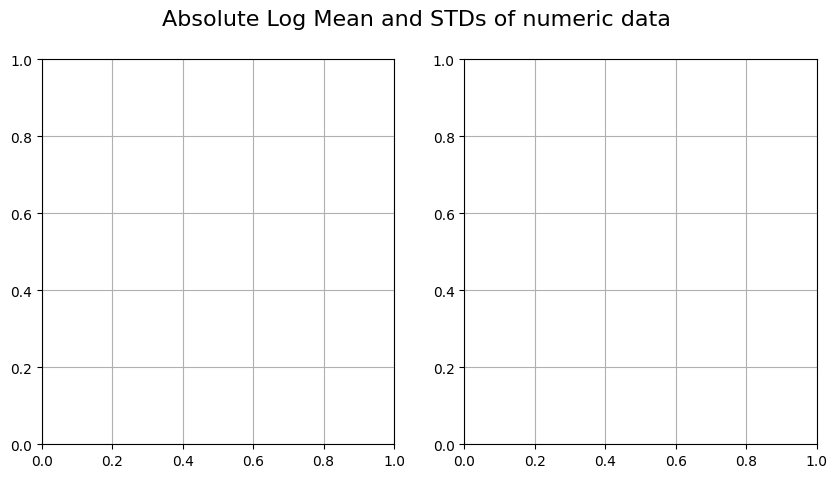

In [51]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= discrete_columns)
#min([], default="EMPTY")
table_evaluator.visual_evaluation()